# AI Project

# Bank Marketing Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [2]:
#For reading the data
data = pd.read_csv('bdata.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,dayofweek,...,p_days,previous,p_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3_m,nr_employed,y,p_days2
0,0.000000,1,2,3,0,0,0,0,4,mon,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1
1,0.045455,9,1,6,0,0,0,0,3,tue,...,0.0,0.0,-1,0.0,0.0,0.0,0.0,0.0,0,1
2,0.090909,7,0,7,0,0,0,0,7,wed,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0,1
3,0.454545,5,0,0,0,0,0,0,0,thu,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1
4,0.181818,4,0,1,0,0,0,0,8,fri,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1


<AxesSubplot:xlabel='y', ylabel='count'>

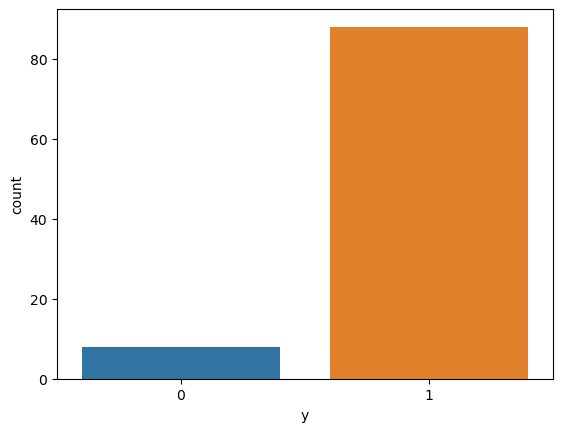

In [3]:
#seaborn is used for data visualization
sns.countplot(x='y',data=data)

In [4]:
#We can see that the data is very skewed, so we duplicate the tuples corresponding to 'yes'
d1=data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

<AxesSubplot:xlabel='y', ylabel='count'>

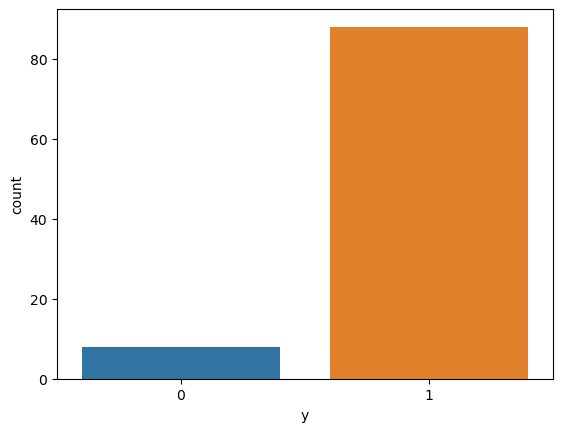

In [5]:
sns.countplot(x='y',data=data)

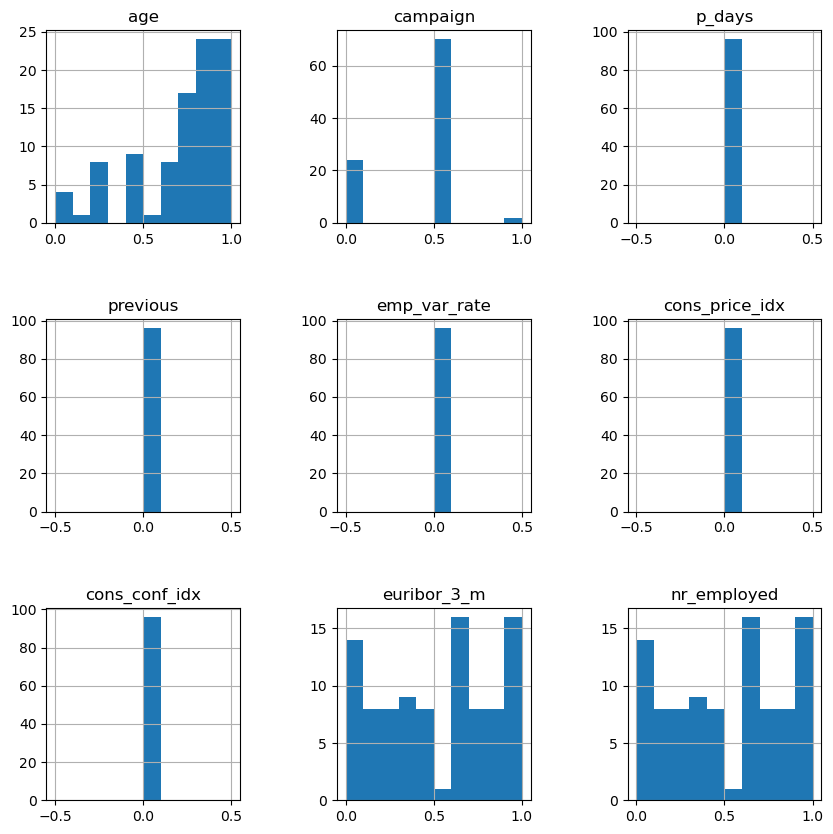

In [6]:
header = ['age','campaign','p_days','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor_3_m','nr_employed']
data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [7]:
#Data is not evenly distributed, therefore we need to standardize
#Splitting 'pdays' feature into 2 features(i.e. 'pdays' and 'pdays2')
#creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['p_days']==999):
        return 0;
    return 1;
data['p_days2']=data.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['p_days']==999):
        return 30;
    return row['p_days'];
data['p_days']=data.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
data['p_days']=data['p_days'].astype(int)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,dayofweek,...,p_days,previous,p_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3_m,nr_employed,y,p_days2
0,0.000000,1,2,3,0,0,0,0,4,mon,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1
1,0.045455,9,1,6,0,0,0,0,3,tue,...,0,0.0,-1,0.0,0.0,0.0,0.0,0.0,0,1
2,0.090909,7,0,7,0,0,0,0,7,wed,...,0,0.0,1,0.0,0.0,0.0,0.0,0.0,0,1
3,0.454545,5,0,0,0,0,0,0,0,thu,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1
4,0.181818,4,0,1,0,0,0,0,8,fri,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1


In [8]:
#Standardizing the data
idx_numeric=[0,10,11,12,14,15,16,17,18]
scaler = MinMaxScaler()
data[data.columns[idx_numeric]] = scaler.fit_transform(data[data.columns[idx_numeric]])

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,dayofweek,...,p_days,previous,p_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3_m,nr_employed,y,p_days2
0,0.000000,1,2,3,0,0,0,0,4,mon,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1
1,0.045455,9,1,6,0,0,0,0,3,tue,...,0.0,0.0,-1,0.0,0.0,0.0,0.0,0.0,0,1
2,0.090909,7,0,7,0,0,0,0,7,wed,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0,1
3,0.454545,5,0,0,0,0,0,0,0,thu,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1
4,0.181818,4,0,1,0,0,0,0,8,fri,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1


In [10]:
#Categorical variables can be either Ordinal or Nominal
data['p_outcome'] = data['p_outcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
data['default'] = data['default'].map({'yes': -1,'unknown': 0,'no': 1})
data['housing'] = data['housing'].map({'yes': -1,'unknown': 0,'no': 1})
data['loan'] = data['loan'].map({'yes': -1,'unknown': 0,'no': 1})

In [11]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month','dayofweek']
dataProcessed = pd.get_dummies(data,columns=nominal)
dataProcessed['y']=dataProcessed['y'].map({'yes': 1,'no': 0})
dataProcessed.head()

,age,default,housing,loan,campaign,p_days,previous,p_outcome,emp_var_rate,cons_price_idx,...,month_7,month_8,month_9,month_10,month_11,dayofweek_fri,dayofweek_mon,dayofweek_thu,dayofweek_tue,dayofweek_wed
0,0.000000,NaN,NaN,NaN,0.5,0.0,0.0,NaN,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,0.045455,NaN,NaN,NaN,0.5,0.0,0.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.090909,NaN,NaN,NaN,0.5,0.0,0.0,NaN,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0.454545,NaN,NaN,NaN,0.5,0.0,0.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.181818,NaN,NaN,NaN,1.0,0.0,0.0,NaN,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0


In [12]:
dataProcessed.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'p_days', 'previous',
       'p_outcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor_3_m', 'nr_employed', 'y', 'p_days2', 'job_0', 'job_1', 'job_2',
       'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10',
       'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1',
       'education_2', 'education_3', 'education_4', 'education_5',
       'education_6', 'education_7', 'contact_0', 'contact_1', 'month_0',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'dayofweek_fri', 'dayofweek_mon', 'dayofweek_thu', 'dayofweek_tue',
       'dayofweek_wed'],
      dtype='object')

In [13]:
dataProcessed.to_csv("bdata.csv", index=False)
#Data is Encoded

In [14]:
#Label Encoding
le = preprocessing.LabelEncoder()
data.job = le.fit_transform(data.job)
data.marital = le.fit_transform(data.marital)
data.education = le.fit_transform(data.education)
data.default = le.fit_transform(data.default)
data.housing = le.fit_transform(data.housing)
data.loan = le.fit_transform(data.loan)
data.contact = le.fit_transform(data.contact)
data.month = le.fit_transform(data.month)
data.day_of_week = le.fit_transform(data.dayofweek)
data.poutcome = le.fit_transform(data.p_outcome)
data.y = le.fit_transform(data.y)
data.head()

C:\Users\AA\AppData\Local\Temp\ipykernel_7968\3542854652.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.day_of_week = le.fit_transform(data.dayofweek)
C:\Users\AA\AppData\Local\Temp\ipykernel_7968\3542854652.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.poutcome = le.fit_transform(data.p_outcome)


,age,job,marital,education,default,housing,loan,contact,month,dayofweek,...,p_days,previous,p_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3_m,nr_employed,y,p_days2
0,0.000000,1,2,3,0,0,0,0,4,mon,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,1
1,0.045455,9,1,6,0,0,0,0,3,tue,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,1
2,0.090909,7,0,7,0,0,0,0,7,wed,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,1
3,0.454545,5,0,0,0,0,0,0,0,thu,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,1
4,0.181818,4,0,1,0,0,0,0,8,fri,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,1


In [15]:
#returns a tuple with the number of rows, and the number of columns for the data in the DataFrame
data.shape

(96, 21)

In [16]:
data.to_csv("bdata.csv", index=False)

In [17]:
#Logistic Regression with Linear and Polynomial Features
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [18]:
#Reading data
data = pd.read_csv('data.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,dayofweek,...,p_days,previous,p_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3_m,nr_employed,y,pdays2
0,0.481481,3,1,0,0,0,0,1,6,1,...,1,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1
1,0.493827,7,1,3,1,0,0,1,6,1,...,1,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1
2,0.246914,7,1,3,0,2,0,1,6,1,...,1,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1
3,0.283951,0,1,1,0,0,0,1,6,1,...,1,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,0
4,0.481481,7,1,3,0,0,2,1,6,1,...,1,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,1,0


In [19]:
#Columns of the given data
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'dayofweek', 'campaign', 'p_days', 'previous',
       'p_outcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor_3_m', 'nr_employed', 'y', 'pdays2'],
      dtype='object')

In [20]:
# Saperating features and result vectors
#column axis ( axis='columns' )
X = data.drop('y', axis=1).values
y = data['y'].values

In [21]:
#Test Train Split
#Train_test_split() method is used to split our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
poly_features_1 = PolynomialFeatures(degree=1)
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_3 = PolynomialFeatures(degree=3)

In [23]:
X_train_poly1 = poly_features_1.fit_transform(X_train)
X_train_poly2 = poly_features_2.fit_transform(X_train)
X_train_poly3 = poly_features_3.fit_transform(X_train)

In [24]:
#Logistic Regression with Linear Features
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly1, y_train)
y_test_predict = logisticRegr.predict(poly_features_1.fit_transform(X_test))
acc1 = metrics.accuracy_score(y_test_predict, y_test)
pre1 = metrics.precision_score(y_test_predict,y_test)
rec1 = metrics.recall_score(y_test_predict,y_test)
f1_1 = metrics.f1_score(y_test_predict,y_test)

In [25]:
#Logistic Regression with Polynomial Features of degree=2
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly2, y_train)
y_test_predict = logisticRegr.predict(poly_features_2.fit_transform(X_test))
acc2 = metrics.accuracy_score(y_test_predict, y_test)
pre2 = metrics.precision_score(y_test_predict,y_test)
rec2 = metrics.recall_score(y_test_predict,y_test)
f1_2 = metrics.f1_score(y_test_predict,y_test)

F:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
#Logistic Regression with Polynomial Features of degree=3
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly3, y_train)
y_test_predict = logisticRegr.predict(poly_features_3.fit_transform(X_test))
acc3 = metrics.accuracy_score(y_test_predict, y_test)
pre3 = metrics.precision_score(y_test_predict,y_test)
rec3 = metrics.recall_score(y_test_predict,y_test)
f1_3 = metrics.f1_score(y_test_predict,y_test)

F:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
#Comparing the results
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc1, pre1, rec1, f1_1],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3]})
table

,Metric,Logistic Regression with Linear Features,Logistic Regression with Features of Degree=2,Logistic Regression with Features of Degree=3
0,Accuracy,0.733333,0.566667,0.633333
1,Precision,0.111111,0.222222,0.222222
2,Recall,1.000000,0.250000,0.333333
3,F1 Score,0.200000,0.235294,0.266667


In [28]:
#Model evaluation after appliying PCA(Principal Component Analysis )
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
x_pca = pca.fit_transform(X)
x_pca.shape

(99, 3)

In [35]:
#Observation
#We can see that with just 24 Features instead 56 Features we can get the same accuracy
#Plotting the ROC (receiver operating characteristic) Curve for Better Visualization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
logisticRegr = LogisticRegression()
poly_features_2 = PolynomialFeatures(degree=2)
X_poly2 = poly_features_2.fit_transform(X_train)
logisticRegr.fit(X_poly2, y_train)
predict = logisticRegr.predict(poly_features_2.fit_transform(X_test))
#data['predict'] = predict
TP2 = np.sum([(c==1 and p==1) for c,p in zip(y_test,predict)])
TN2 = np.sum([(c==0 and p==0) for c,p in zip(y_test,predict)])
FP2 = np.sum([(c==0 and p==1) for c,p in zip(y_test,predict)])
FN2 = np.sum([(c==1 and p==0) for c,p in zip(y_test,predict)])
P2 = np.sum(y_test)
N2 = len(y_test) - P2
phat2 = logisticRegr.predict_proba(poly_features_2.fit_transform(X_test))[:,1]

F:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
logisticRegr = LogisticRegression()
poly_features_1 = PolynomialFeatures(degree=1)
X_poly1 = poly_features_1.fit_transform(X_train)
logisticRegr.fit(X_poly1, y_train)
predict = logisticRegr.predict(poly_features_1.fit_transform(X_test))
#data['predict'] = predict
TP1 = np.sum([(c==1 and p==1) for c,p in zip(y_test,predict)])
TN1 = np.sum([(c==0 and p==0) for c,p in zip(y_test,predict)])
FP1 = np.sum([(c==0 and p==1) for c,p in zip(y_test,predict)])
FN1 = np.sum([(c==1 and p==0) for c,p in zip(y_test,predict)])
P1 = np.sum(y_test)
N1 = len(y_test) - P1
phat1 = logisticRegr.predict_proba(poly_features_1.fit_transform(X_test))[:,1]

In [38]:
logisticRegr = LogisticRegression()
poly_features_3 = PolynomialFeatures(degree=3)
X_poly3 = poly_features_3.fit_transform(X_train)
logisticRegr.fit(X_poly3, y_train)
predict = logisticRegr.predict(poly_features_3.fit_transform(X_test))
#data['predict'] = predict
TP3 = np.sum([(c==1 and p==1) for c,p in zip(y_test,predict)])
TN3 = np.sum([(c==0 and p==0) for c,p in zip(y_test,predict)])
FP3 = np.sum([(c==0 and p==1) for c,p in zip(y_test,predict)])
FN3 = np.sum([(c==1 and p==0) for c,p in zip(y_test,predict)])
P3 = np.sum(y_test)
N3 = len(y_test) - P3
phat3 = logisticRegr.predict_proba(poly_features_3.fit_transform(X_test))[:,1]

F:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


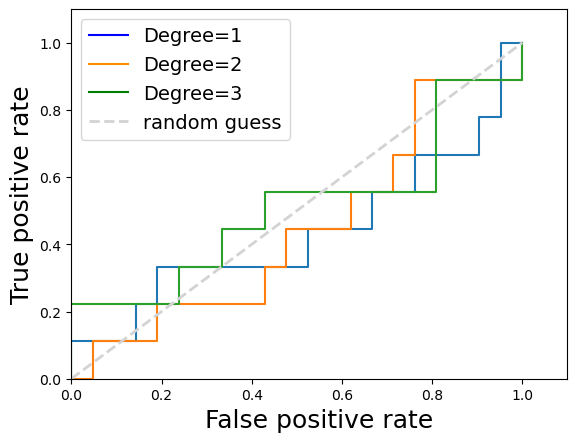

In [39]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, phat1)
plt.plot(fpr1, tpr1)
plt.plot(FP1/N1, TP1/P1, label = 'Degree=1', color='blue')

fpr2, tpr2, thresholds2 = roc_curve(y_test, phat2)
plt.plot(fpr2, tpr2)
plt.plot(FP2/N2, TP2/P2, label = 'Degree=2', color='darkorange')

fpr3, tpr3, thresholds3 = roc_curve(y_test, phat3)
plt.plot(fpr3, tpr3)
plt.plot(FP3/N3, TP3/P3, label = 'Degree=3', color='green')

x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.show()

# Random Forest Classifier

In [40]:
#Obtain parsimonious solutions for regression and classification by using RFC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv("data.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,dayofweek,...,p_days,previous,p_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3_m,nr_employed,y,pdays2
0,0.481481,3,1,0,0,0,0,1,6,1,...,1,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1
1,0.493827,7,1,3,1,0,0,1,6,1,...,1,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1
2,0.246914,7,1,3,0,2,0,1,6,1,...,1,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1
3,0.283951,0,1,1,0,0,0,1,6,1,...,1,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,0
4,0.481481,7,1,3,0,0,2,1,6,1,...,1,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,1,0


In [42]:
# raw data
X = df.drop('y', axis=1).values
y = df['y'].values
X.shape,y.shape

((99, 20), (99,))

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [44]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [45]:
predict = rfc.predict(x_test)

In [46]:
acc = accuracy_score(predict, y_test)
pre = precision_score(predict, y_test)
rec = recall_score(predict, y_test)
f1 = f1_score(predict, y_test)

In [47]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [acc, pre, rec, f1]
    })
table

,Metric,Score
0,Accuracy,0.733333
1,Precision,0.111111
2,Recall,1.000000
3,F1 Score,0.200000


In [48]:
df = pd.read_csv("data.csv")
X = df.drop('y', axis=1).values
y = df['y'].values
pp=df.drop('y', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
feature_importances = pd.DataFrame(rfc.feature_importances_,index = pp.columns,columns=['importance']).sort_values('importance',ascending=False)

In [49]:
feature_importances

,importance
age,0.236070
education,0.176540
job,0.169095
pdays2,0.114897
housing,0.086761
default,0.084005
marital,0.059914
loan,0.048983
campaign,0.023736
contact,0.000000


# This is a list of all features ranked based on their importance to the random forest classifier